<a href="https://colab.research.google.com/github/njonge-nathan/Compiler-Construction/blob/main/LAB_ACTIVITY_1_%5BFlex%2C_Bison%2C_Lex%2C_Yacc%5D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Members

094230 - Nathan Njonge ICS4A

# Lab Activity 1

Give brief descriptions of the following tools:

Flex, Bison, Lex, Yacc

The description should have: 3-5 lines definition, diagram and code snippet

# Flex

## Definition
* Flex is an acronym that stands for "fast lexical analyzer generator".It is a tool for generating scanners: programs which recognize lexical patterns in text.
* flex reads the given input files (or its standard input if no file names are given) for a description of the scanner to generate.The description is in the form of pairs of regular expressions and C code, called rules.
* flex generates as output a C source file, `lex.yy.c', which defines a routine yylex. Compile and link this file with the `-lfl' library to produce an executable. When the executable runs, it analyzes its input for occurrences of the regular expressions. Whenever it finds one, it executes the corresponding C code.

## Diagram

The image describes how a FLEX is used


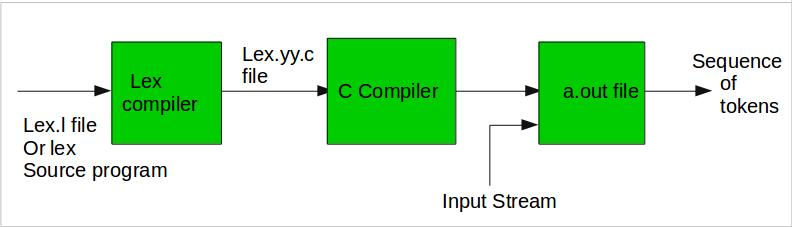

* Step 1: An input file describes the lexical analyzer to be generated named lex.l is written in lex language. The lex compiler transforms lex.l to C program, in a file that is always named lex.yy.c. 
* Step 2: The C compiler compile lex.yy.c file into an executable file called a.out. 
* Step 3: The output file a.out take a stream of input characters and produce a stream of tokens.

## Code snippet

In [ ]:
/*** Definition Section has one variable
which can be accessed inside yylex()
and main() ***/
%{
int count = 0;
%}

/*** Rule Section has three rules, first rule
matches with capital letters, second rule
matches with any character except newline and
third rule does not take input after the enter***/
%%
[A-Z] {printf("%s capital letter\n", yytext);
	count++;}
.	 {printf("%s not a capital letter\n", yytext);}
\n {return 0;}
%%

/*** Code Section prints the number of
capital letter present in the given input***/
int yywrap(){}
int main(){

// Explanation:
// yywrap() - wraps the above rule section
/* yyin - takes the file pointer
		which contains the input*/
/* yylex() - this is the main flex function
		which runs the Rule Section*/
// yytext is the text in the buffer

// Uncomment the lines below
// to take input from file
// FILE *fp;
// char filename[50];
// printf("Enter the filename: \n");
// scanf("%s",filename);
// fp = fopen(filename,"r");
// yyin = fp;

yylex();
printf("\nNumber of Capital letters "
	"in the given input - %d\n", count);

return 0;
}


# Bison

## Definition

* Bison is a general-purpose parser generator that converts a grammar description (Bison Grammar Files) for an LALR(1) context-free grammar into a C program to parse that grammar.

* The Bison parser is a bottom-up parser. It tries, by shifts and reductions, to reduce the entire input down to a single grouping whose symbol is the grammar's start-symbol.

## Diagram

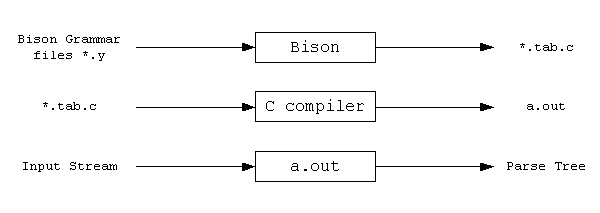

Steps to use Bison:

* Write a lexical analyzer to process input and pass tokens to the parser (calc.lex).
* Write the grammar specification for bison (calc.y), including grammar rules, yyparse() and yyerror().
* Run Bison on the grammar to produce the parser. (Makefile)
* Compile the code output by Bison, as well as any other source files.
* Link the object files to produce the finished product.

## Code snippet

desk calculator which performs '+' and '*' on unsigned integers

In [ ]:
/* Mini Calculator */
/* calc.lex */

%{
#include "heading.h"
#include "tok.h"
int yyerror(char *s);
int yylineno = 1;
%}

digit		[0-9]
int_const	{digit}+

%%

{int_const}	{ yylval.int_val = atoi(yytext); return INTEGER_LITERAL; }
"+"		{ yylval.op_val = new std::string(yytext); return PLUS; }
"*"		{ yylval.op_val = new std::string(yytext); return MULT; }

[ \t]*		{}
[\n]		{ yylineno++;	}

.		{ std::cerr << "SCANNER "; yyerror(""); exit(1);	}


In [ ]:
/* Mini Calculator */
/* calc.y */

%{
#include "heading.h"
int yyerror(char *s);
int yylex(void);
%}

%union{
  int		int_val;
  string*	op_val;
}

%start	input 

%token	<int_val>	INTEGER_LITERAL
%type	<int_val>	exp
%left	PLUS
%left	MULT

%%

input:		/* empty */
		| exp	{ cout << "Result: " << $1 << endl; }
		;

exp:		INTEGER_LITERAL	{ $$ = $1; }
		| exp PLUS exp	{ $$ = $1 + $3; }
		| exp MULT exp	{ $$ = $1 * $3; }
		;

%%

int yyerror(string s)
{
  extern int yylineno;	// defined and maintained in lex.c
  extern char *yytext;	// defined and maintained in lex.c
  
  cerr << "ERROR: " << s << " at symbol \"" << yytext;
  cerr << "\" on line " << yylineno << endl;
  exit(1);
}

int yyerror(char *s)
{
  return yyerror(string(s));
}



In [ ]:
# Makefile

OBJS	= bison.o lex.o main.o

CC	= g++
CFLAGS	= -g -Wall -ansi -pedantic

calc:		$(OBJS)
		$(CC) $(CFLAGS) $(OBJS) -o calc -lfl

lex.o:		lex.c
		$(CC) $(CFLAGS) -c lex.c -o lex.o

lex.c:		calc.lex 
		flex calc.lex
		cp lex.yy.c lex.c

bison.o:	bison.c
		$(CC) $(CFLAGS) -c bison.c -o bison.o

bison.c:	calc.y
		bison -d -v calc.y
		cp calc.tab.c bison.c
		cmp -s calc.tab.h tok.h || cp calc.tab.h tok.h

main.o:		main.cc
		$(CC) $(CFLAGS) -c main.cc -o main.o

lex.o yac.o main.o	: heading.h
lex.o main.o		: tok.h

clean:
	rm -f *.o *~ lex.c lex.yy.c bison.c tok.h calc.tab.c calc.tab.h calc.output calc


In [ ]:
/* main.cc */

#include "heading.h"

// prototype of bison-generated parser function
int yyparse();

int main(int argc, char **argv)
{
  if ((argc > 1) && (freopen(argv[1], "r", stdin) == NULL))
  {
    cerr << argv[0] << ": File " << argv[1] << " cannot be opened.\n";
    exit( 1 );
  }
  
  yyparse();

  return 0;
}


In [ ]:
/* heading.h */

#define YY_NO_UNPUT

using namespace std;

#include <iostream>
#include <stdio.h>
#include <string>


# Lex 

## Definition

* It is a tool or software which automatically generates a lexical analyzer (finite Automata). It takes as its input a LEX source program and produces lexical Analyzer as its output. Lexical Analyzer will convert the input string entered by the user into tokens as its output.
*  LEX is a program generator designed for lexical processing of character input/output stream. Anything from simple text search program that looks for pattern in its input-output file to a C compiler that transforms a program into optimized code.
* In program with structure input-output two tasks occurs over and over. It can divide the input-output into meaningful units and then discovering the relationships among the units for C program (the units are variable names, constants, and strings). 
* This division into units (called tokens) is known as lexical analyzer or LEXING. LEX helps by taking a set of descriptions of possible tokens n producing a routine called a lexical analyzer or LEXER or Scanner.

## Diagram

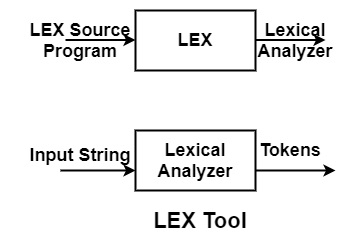

## Code Snippet

In [ ]:
/*Lex code to count total number of tokens */

%{
int n = 0 ;
%}

// rule section
%%

//count number of keywords
"while"|"if"|"else" {n++;printf("\t keywords : %s", yytext);}

// count number of keywords
"int"|"float" {n++;printf("\t keywords : %s", yytext);}

// count number of identifiers
[a-zA-Z_][a-zA-Z0-9_]* {n++;printf("\t identifier : %s", yytext);}

// count number of operators
"<="|"=="|"="|"++"|"-"|"*"|"+" {n++;printf("\t operator : %s", yytext);}

// count number of separators
[(){}|, ;] {n++;printf("\t separator : %s", yytext);}

// count number of floats
[0-9]*"."[0-9]+ {n++;printf("\t float : %s", yytext);}

// count number of integers
[0-9]+ {n++;printf("\t integer : %s", yytext);}						

. ;
%%


int main()

{
	
	yylex();
	
	printf("\n total no. of token = %d\n", n);
	
}


# Yacc

## Definition

* YACC stands for Yet Another Compiler Compiler.YACC provides a tool to produce a parser for a given grammar.
* YACC is a program designed to compile a LALR (1) grammar. It is used to produce the source code of the syntactic analyzer of the language produced by LALR (1) grammar.
* The input of YACC is the rule or grammar and the output is a C program.

## Diagram



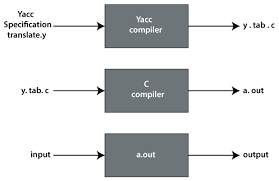

## Code Snippet

In [ ]:
%{
#include <ctype.h>
#include <stdio.h>
#define YYSTYPE double /* double type for yacc stack */
%}

%%
Lines : Lines S '\n' { printf("OK \n"); }
	| S '\n’
	| error '\n' {yyerror("Error: reenter last line:");
						yyerrok; };
S	 : '(' S ')’
	| '[' S ']’
	| /* empty */ ;
%%

#include "lex.yy.c"

void yyerror(char * s)
/* yacc error handler */
{
fprintf (stderr, "%s\n", s);
}

int main(void)
{
return yyparse();
}


In [ ]:
%{
%}

%%
[ \t]	 { /* skip blanks and tabs */ }
\n|.	 { return yytext[0]; }
%%


## Compiling Yaac program
Write lex program in a file file.l and yacc in a file file.y 
 
Open Terminal and Navigate to the Directory where you have saved the files. 
 
type lex file.l 
 
type yacc file.y 
 
type cc lex.yy.c y.tab.h -ll 
 
type ./a.out 